# Insurance Cost Analysis

- Load the data as a pandas dataframe
- Clean the data, taking care of the blank entries
- Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
- Develop single variable and multi variable Linear Regression models for predicting the charges
- Use Ridge regression to refine the performance of Linear regression models.

### <p>For better analysis of the data, numbers were assigned instead of values:</p>

<div align="center">
<h3>Gender</h3>
</div>

<table style="text-align: left;">
<thead>
<tr><th>Gender</th><th>Assigned Value</th></tr>
</thead>
<tbody>
<tr><td>Female</td><td>1</td></tr>
<tr><td>Male</td><td>2</td></tr>
</tbody>
</table>

</br>

<div align="center">
<h3>Smoker</h3>
</div>
<table style="text-align: left;">
<thead>
<tr><th>Smoker</th><th>Assigned Value</th></tr>
</thead>
<tbody>
<tr><td>Smoker</td><td>0</td></tr>
<tr><td>Non-Smoker</td><td>1</td></tr>
</tbody>
</table>

</br>

<div align="center">
<h3>Region</h3>
</div>
<table style="text-align: left;">
<thead>
<tr><th>Region</th><th>Assigned Value</th></tr>
</thead>
<tbody>
<tr><td>Northwest</td><td>1</td></tr>
<tr><td>Northeast</td><td>2</td></tr>
<tr><td>Southwest</td><td>3</td></tr>
<tr><td>Southeast</td><td>4</td></tr>
</tbody>
</table>



In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [139]:
file_name = "insurance.csv"

In [11]:
# Set path
df = pd.read_csv("insurance.csv", header=None)

In [12]:
# Print df
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


Data set has no header, so we will add it

In [13]:
# Add headers
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [15]:
# Check df
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


### Data  Wrangling

In [16]:
# Check column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


As we can see, age and smoker are considered objects we will have to change that data type to int

In [17]:
# Update data types
df["smoker"] = df["smoker"].astype("int")

ValueError: invalid literal for int() with base 10: '?'

In [18]:
# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

ValueError: invalid literal for int() with base 10: '?'

As you can see above when you first try to convert the column values you get an error:

<b>ValueError:<b/> invalid literal for int() with base 10: '?'

so we have to find the column that has missing data, and either remove the rows or add a mean(avg) value to those rows where the data is missing.

In [19]:
# checking for missing values:

null_count = df.isna().sum()
print(null_count)

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64


In [20]:
missing_data = df.isnull()
missing_data.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [21]:
# checking for missing values:

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

age
age
False    2772
Name: count, dtype: int64

gender
gender
False    2772
Name: count, dtype: int64

bmi
bmi
False    2772
Name: count, dtype: int64

no_of_children
no_of_children
False    2772
Name: count, dtype: int64

smoker
smoker
False    2772
Name: count, dtype: int64

region
region
False    2772
Name: count, dtype: int64

charges
charges
False    2772
Name: count, dtype: int64



In [22]:
missing_data = df.isnull()
missing_data.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [24]:
# Update data types
df["smoker"] = df["smoker"].astype("int")

ValueError: invalid literal for int() with base 10: '?'

In [25]:
#Not ideal, but printed all the rows in the df to see where the error was, row 234 in the age column has a null value (?).
#To fix it, we will add the mean to both columns so we can fill up those null values

In [26]:
# Replace '?' with NaN
df["age"] = df["age"].replace('?', np.nan)

In [27]:
# Convert the age column to float for mean calculation
df["age"] = df["age"].astype('float')

In [28]:
# Calculate the mean of the age column, excluding NaN values
mean_age = df["age"].mean()

In [104]:
# Replace NaN values in the age column with the mean age
df["age"].fillna(mean_age, inplace=True)

C:\Users\dfm_n\AppData\Local\Temp\ipykernel_29436\697676628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(mean_age, inplace=True)


In [100]:
# Replace NaN values in the smoker column with the most frequent value
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

In [31]:
# Convert data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

ValueError: invalid literal for int() with base 10: '?'

In [68]:
# Output to check if the operation was successful
df.dtypes

age               float64
gender              int64
bmi               float64
no_of_children      int64
smoker             object
region              int64
charges           float64
dtype: object

In [33]:
# calling df
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1,3,16884.92400
1,18.0,2,33.770,1,0,4,1725.55230
2,28.0,2,33.000,3,0,4,4449.46200
3,33.0,2,22.705,0,0,1,21984.47061
4,32.0,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47.0,1,45.320,1,0,4,8569.86180
2768,21.0,1,34.600,0,0,3,2020.17700
2769,19.0,2,26.030,1,1,1,16450.89470
2770,23.0,2,18.715,0,0,1,21595.38229


<p>As you can see the bmi and the charges roles have multiple numbers after the column.</p>

<p>We want to creat a pattern and leave only two digts after the decimal.</p>

In [34]:
# Rounding up values
df[["charges"]] = np.round(df[["charges"]],2)
df[["bmi"]] = np.round(df[["bmi"]],2)
print(df.head())

    age  gender    bmi  no_of_children smoker  region   charges
0  19.0       1  27.90               0      1       3  16884.92
1  18.0       2  33.77               1      0       4   1725.55
2  28.0       2  33.00               3      0       4   4449.46
3  33.0       2  22.70               0      0       1  21984.47
4  32.0       2  28.88               0      0       1   3866.86


In [35]:
df.tail(8)

,age,gender,bmi,no_of_children,smoker,region,charges
2764,22.0,1,31.02,3,1,4,35595.59
2765,47.0,2,36.08,1,1,4,42211.14
2766,18.0,2,23.32,1,0,4,1711.03
2767,47.0,1,45.32,1,0,4,8569.86
2768,21.0,1,34.60,0,0,3,2020.18
2769,19.0,2,26.03,1,1,1,16450.89
2770,23.0,2,18.72,0,0,1,21595.38
2771,54.0,2,31.60,0,0,3,9850.43


In [86]:
# Check the statistical summary of each column
df.describe(include = "all")

# smoker column wasn't included so used the all syntax to call it

,age,gender,bmi,no_of_children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,1.507215,30.701522,1.101732,0.203463,2.559885,13261.369957
std,14.081459,0.500038,6.129228,1.214806,0.402647,1.130761,12151.768970
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.870000
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4687.800000
50%,39.000000,2.000000,30.450000,1.000000,0.000000,3.000000,9333.015000
75%,51.000000,2.000000,34.770000,2.000000,0.000000,4.000000,16577.780000
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.430000


In [40]:
# Unique values in the 'Smoker' column
unique_smokers = df['smoker'].unique()
print(unique_smokers)

['1' '0' '?']



<p>Smoker still has NaN values, need to fix that </p>

In [105]:
# As smoker is a categorical attribute, will replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

In [46]:
# Get the most frequent value in the 'smoker' column
is_smoker = df['smoker'].value_counts().idxmax()

# Replace NaN values with the most frequent value
df['smoker'] = df['smoker'].fillna(is_smoker)

In [47]:
# Unique values in the 'Smoker' column
unique_smokers = df['smoker'].unique()
print(unique_smokers)

['1' '0' '?']


In [72]:
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)

smoker
0    2201
1     564
0       7
Name: count, dtype: int64


<p> We are in a trick position with the smokers column, as you can change the column data type because of the '?' values</p>
<p> And you cant get the most commom number because it is an object column, what you can do is use the value_count()</p>
<p> Method, get the most commom value (as it is only 0 and 1 it is easier to find) and change them.</p>

In [76]:
# Replace '?' for 0
df['smoker'].replace('?', int(0), inplace=True)

In [77]:
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)

smoker
0    2201
1     564
0       7
Name: count, dtype: int64


In [106]:
df['smoker'].replace('1', int(1), inplace=True)
df['smoker'].replace('0', int(0), inplace=True)

In [79]:
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)

smoker
0    2208
1     564
Name: count, dtype: int64


Replaced the 0 and 1 that were objects for int values, now the column is considered an integer column as well and once the describe() method is called you will be able to see the statistical values 

In [85]:
df.dtypes

age               float64
gender              int64
bmi               float64
no_of_children      int64
smoker              int64
region              int64
charges           float64
dtype: object

In [81]:
df.describe()

,age,gender,bmi,no_of_children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,1.507215,30.701522,1.101732,0.203463,2.559885,13261.369957
std,14.081459,0.500038,6.129228,1.214806,0.402647,1.130761,12151.768970
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.870000
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4687.800000
50%,39.000000,2.000000,30.450000,1.000000,0.000000,3.000000,9333.015000
75%,51.000000,2.000000,34.770000,2.000000,0.000000,4.000000,16577.780000
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.430000


In [61]:
# Unique values in the 'age' column
unique_smokers = df['age'].unique()
print(unique_smokers)

[19.         18.         28.         33.         32.         31.
 46.         37.         60.         25.         62.         23.
 56.         27.         52.         30.         34.         59.
 63.         55.         22.         26.         35.         24.
 41.         38.         36.         21.         48.         40.
 58.         53.         43.         64.         20.         61.
 44.         57.         29.         45.         54.         49.
 47.         51.         42.         50.         39.         39.10982659]


Age should be a round value:

In [63]:
# Rounding up values
df[["age"]] = np.round(df[["age"]],0)

In [64]:
# Unique values in the 'age' column
unique_smokers = df['age'].unique()
print(unique_smokers)

[19. 18. 28. 33. 32. 31. 46. 37. 60. 25. 62. 23. 56. 27. 52. 30. 34. 59.
 63. 55. 22. 26. 35. 24. 41. 38. 36. 21. 48. 40. 58. 53. 43. 64. 20. 61.
 44. 57. 29. 45. 54. 49. 47. 51. 42. 50. 39.]


#### The Empirical Rule
For all normal distributions, 68.2% of the observations will appear within plus or minus one standard deviation of the mean; 95.4% will fall within +/- two standard deviations; and 99.7% within +/- three standard deviations.
</br>
<a href= "https://www.investopedia.com/terms/n/normaldistribution.asp">Link Investopedia</a>

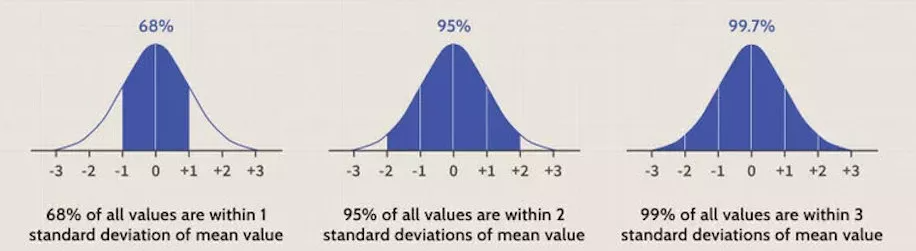

In [88]:
from PIL import Image
from IPython.display import display

# Load and display an image
img = Image.open("normal_distribution_rule.png")
display(img)

We will check this rule with the age column

C:\Users\dfm_n\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dfm_n\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


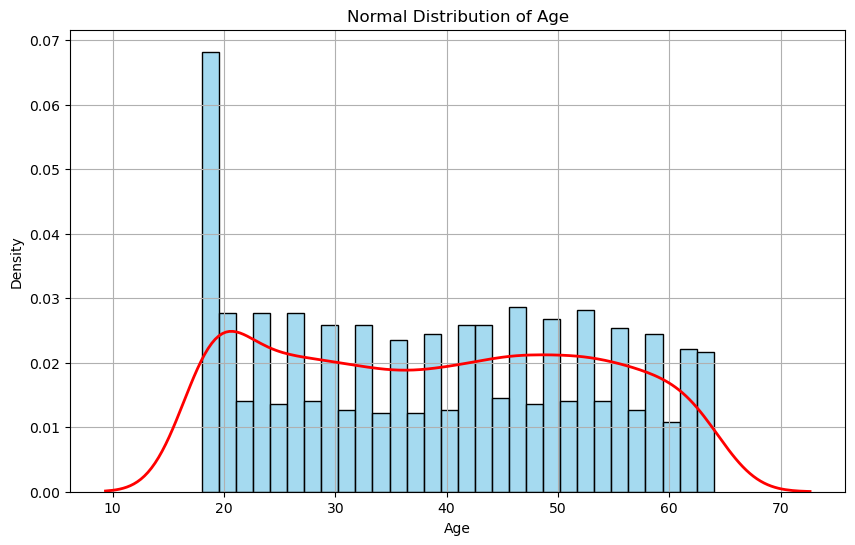

In [108]:
# Plotting the distribution
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(df['age'], kde=False, bins=30, color='skyblue', stat='density')

# Plot normal distribution curve
sns.kdeplot(df['age'], color='red', linewidth=2)

plt.title('Normal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Well, didin't work as we thought it would, but the empirical rule is still a rule when it comes to normal distribution, the distribution we achieven in th

### Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

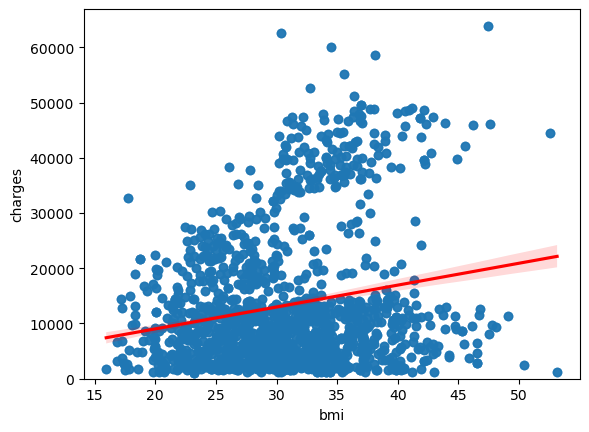

In [110]:
# Regression plot for charges regarding bmi.
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.85800000001)

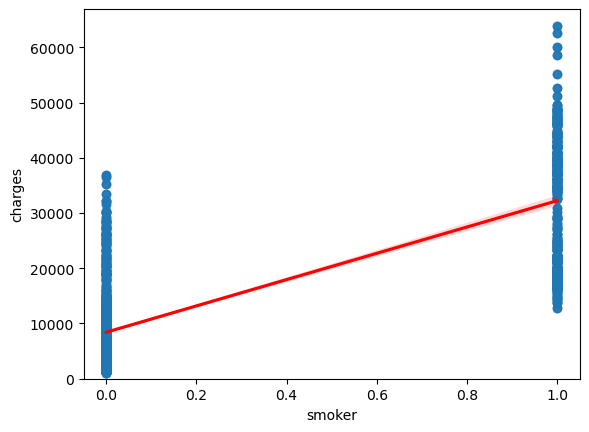

In [112]:
# Regression plot for charges regarding to smoking.
sns.regplot(x = "smoker", y = "charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

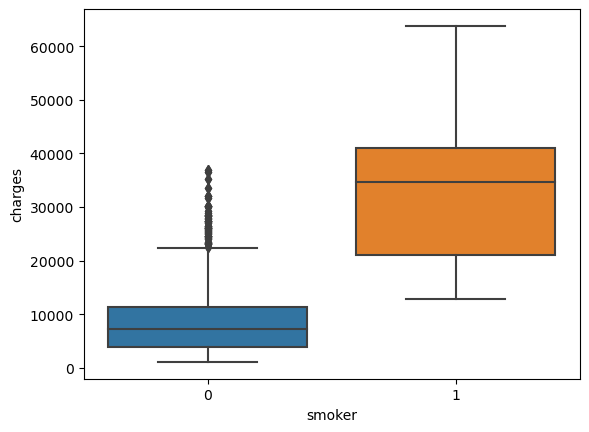

In [113]:
sns.boxplot(x="smoker", y="charges", data=df)

In [116]:
# Dataset correlation
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113054,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042929,0.016020,0.082326,0.022213,0.062837
bmi,0.113054,0.042929,1.000000,-0.001488,0.011482,0.271090,0.199839
no_of_children,0.037574,0.016020,-0.001488,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011482,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271090,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199839,0.066442,0.788783,0.054058,1.000000


### Model Development

Linear regression model used to predict the charges value just using the smoker column. Value printed is R²


In [151]:
# Linear regression 
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Linear regression model used to predict the charges value using all other columns. Value printed is R²

In [152]:
# Linear regression 
Z = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
lm = LinearRegression()
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.7504068682813502


Training a pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() methods to create a model that can predict the charges value using all the other attributes of the dataset. 

In [153]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.845251215370961


### Model Refinment

Split the data into training and testing subsets, will use 20% of the data for testing.

In [154]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Create a ridge regressor that used hyperparameter  𝛼=0.1 (check if it will fit the data properly)
- Fit the model using training data subset. 
- Print the 𝑅2 score for the testing data.

In [155]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760802163185442


Applying polynomial transformation to the training parameters with degree=2. 
</br> Using transformed feature set to fit the same regression model using the training subset. 
- Print the 𝑅2 score for the testing subset.

In [164]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835696037870408


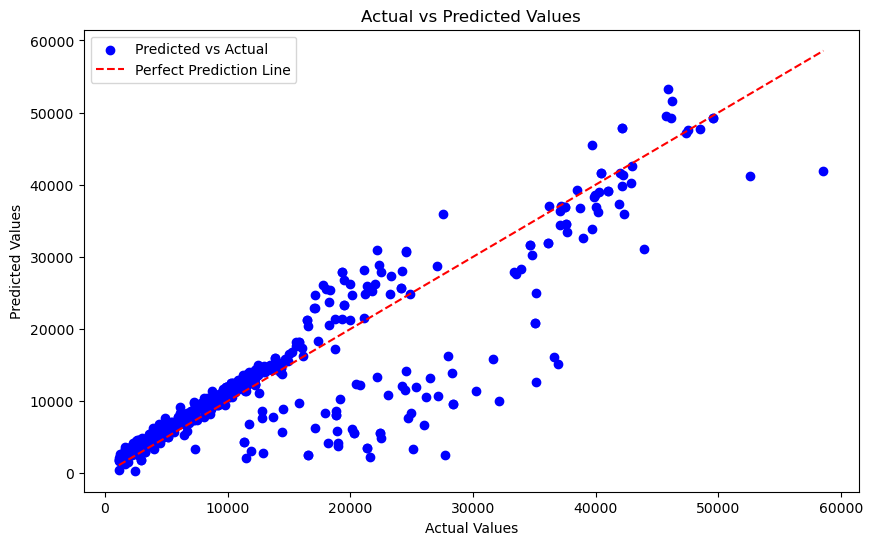

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat, color='blue', label='Predicted vs Actual')

# Plotting the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()
